In [22]:
import pandas as pd
import plotly.express as px
import numpy as np
from sklearn.linear_model import LinearRegression

In [23]:
url = ('MC_DF_FINAL.csv')

df = pd.read_csv(url)

In [24]:
df.head()
df.describe()

,meta_critic_score,score_remean,release_year
count,13301.000000,1.330100e+04,13301.000000
mean,70.368769,4.923210e-15,2011.876400
std,12.262346,1.226235e+01,6.921845
min,23.000000,-4.736877e+01,1996.000000
25%,63.000000,-7.368769e+00,2006.000000
50%,72.000000,1.631231e+00,2012.000000
75%,79.000000,8.631231e+00,2018.000000
max,99.000000,2.863123e+01,2024.000000


In [25]:
df_mean_score = df.meta_critic_score.mean()

df_mean_score

70.36876926546876

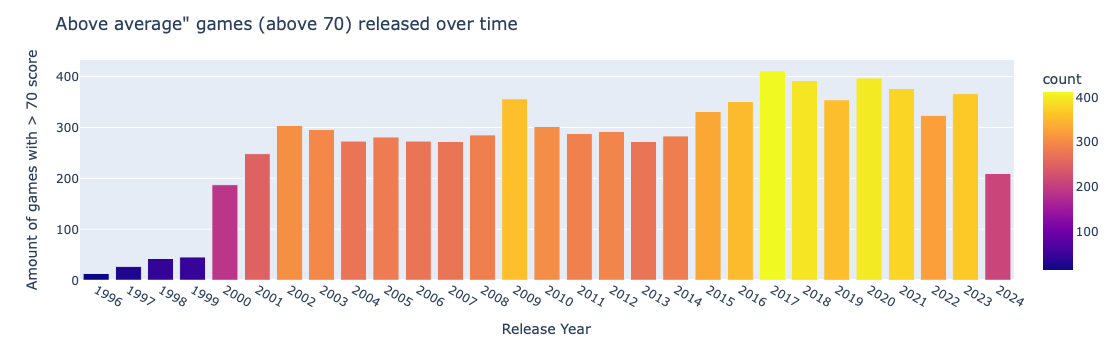

In [29]:
df_year_count = dfTop.groupby('release_year').size().reset_index(name='count')

df_year_count = df_year_count.sort_values(by='release_year', ascending=True)

figYear = px.bar(
    df_year_count, 
    x='release_year', 
    y='count', 
    hover_data=['count'],
    color='count', 
    color_continuous_scale='Plasma' 
)

figYear.update_layout(
    title='Above average" games (above 70) released over time',
    xaxis_title='Release Year',
    yaxis_title='Amount of games with > 70 score',
    xaxis=dict(tickmode ='linear', dtick=1)
)

figYear.show()

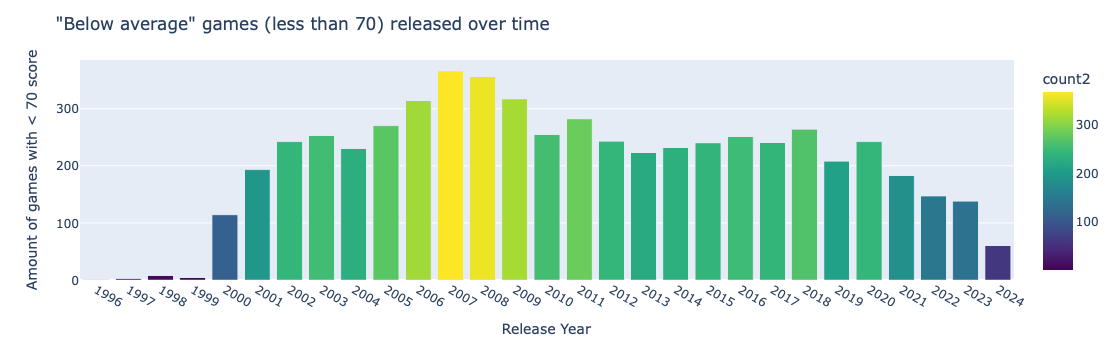

In [31]:
df_year_count2 = dfBottom.groupby('release_year').size().reset_index(name='count2')

df_year_count2 = df_year_count2.sort_values(by='release_year', ascending=True)

figYearBot = px.bar(
    df_year_count2, 
    x='release_year', 
    y='count2', 
    hover_data=['count2'],
    color='count2', 
    color_continuous_scale='Viridis' 
)

figYearBot.update_layout(
    title='"Below average" games (less than 70) released over time',
    xaxis_title='Release Year',
    yaxis_title='Amount of games with < 70 score',
    xaxis=dict(tickmode ='linear', dtick=1)
)

figYearBot.show()

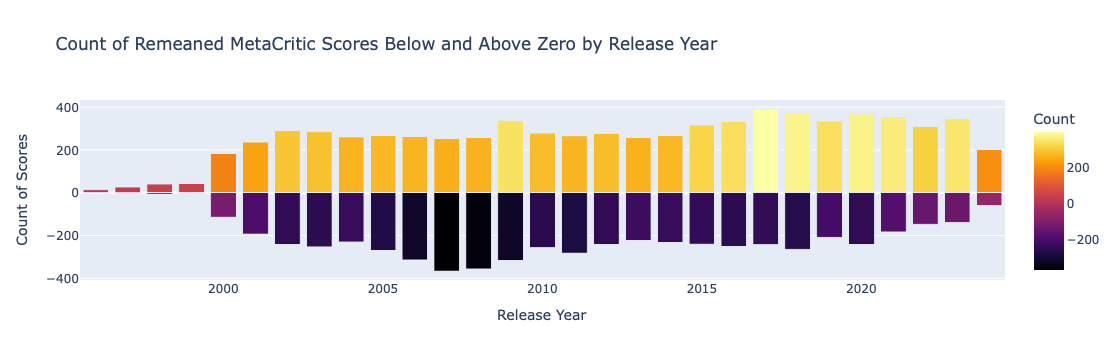

In [48]:
df_sorted_remean = df.sort_values(by='score_remean', ascending=True)

df_sorted_remean['remean_class'] = df_sorted_remean['score_remean'].apply(lambda x: 'below_zero' if x < 0 else 'above_zero')

df_year_mean_count = df_sorted_remean.groupby(['release_year', 'remean_class']).size().reset_index(name='remean_count')

df_year_mean_count.loc[df_year_mean_count['remean_class'] == 'below_zero', 'remean_count'] *= -1

figHisto = px.bar(
    df_year_mean_count, 
    x='release_year', 
    y='remean_count', 
    color='remean_count', 
    color_continuous_scale='Inferno',
    labels={'remean_class': 'Score Category', 'remean_count': 'Count'},
    title='Count of Remeaned MetaCritic Scores Below and Above Zero by Release Year'
)

figHisto.update_layout(
    xaxis_title='Release Year',
    yaxis_title='Count of Scores'
)

figHisto.show()


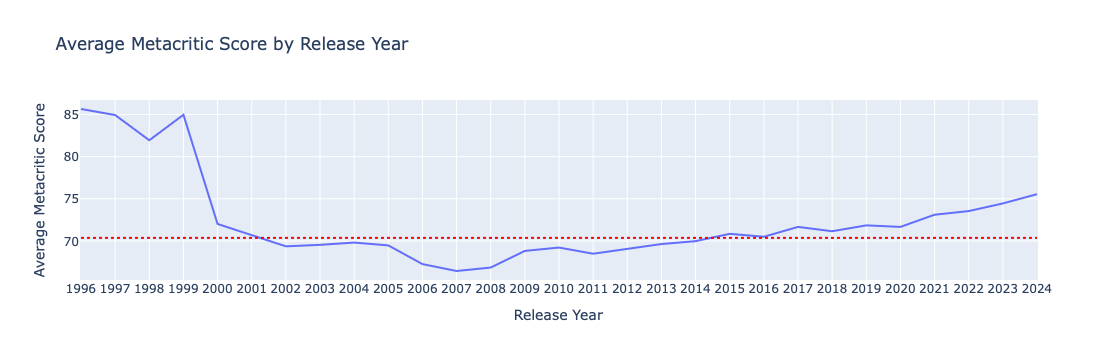

In [26]:
df_avg_score = df.groupby('release_year', as_index=False)['meta_critic_score'].mean()

mean_value = 70.368769

figAvgLine = px.line(df_avg_score, x='release_year', y='meta_critic_score', title='Average Metacritic Score by Release Year')

figAvgLine.add_shape(
    type="line",
    x0=df_avg_score['release_year'].min(),
    x1=df_avg_score['release_year'].max(),
    y0=mean_value,
    y1=mean_value,
    line=dict(color="red", width=2, dash="dot")
)

figAvgLine.update_layout(
    xaxis_title='Release Year',
    yaxis_title='Average Metacritic Score',
    xaxis=dict(tickmode='linear', dtick=1)
)

figAvgLine.show()

In [28]:
dfTop = df[df['meta_critic_score'] >= 70]

In [30]:
dfBottom = df[df['meta_critic_score'] <= 70]

In [32]:
dfCreamCrop = df[df['meta_critic_score'] >= 90]

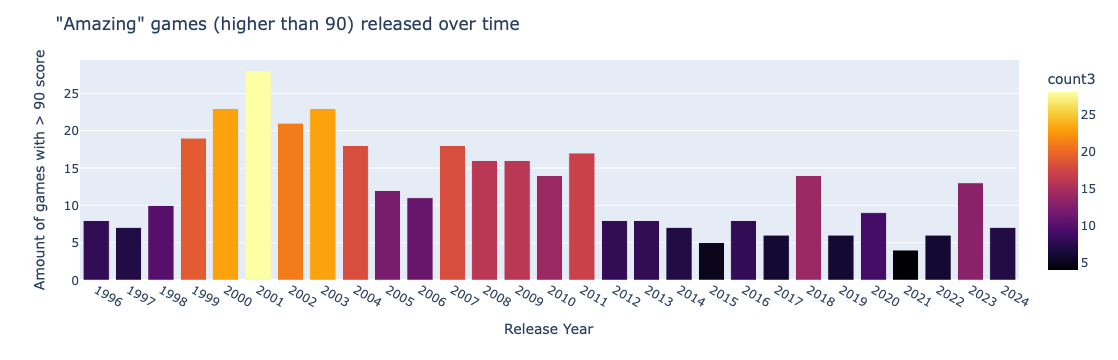

In [44]:
df_year_count3 = dfCreamCrop.groupby('release_year').size().reset_index(name='count3')

df_year_count3 = df_year_count3.sort_values(by='release_year', ascending=True)

figYearBot = px.bar(
    df_year_count3, 
    x='release_year', 
    y='count3', 
    hover_data=['count3'],
    color='count3',  
    color_continuous_scale='Inferno'
)

figYearBot.update_layout(
    title='"Amazing" games (higher than 90) released over time',
    xaxis_title='Release Year',
    yaxis_title='Amount of games with > 90 score',
    xaxis=dict(tickmode ='linear', dtick=1)
)

figYearBot.show()